In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries_PLR.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/home/pratyush/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [6]:
pos = float(input('Position: '))
pos = sc_X.transform([[pos]])
sc_y.inverse_transform(regressor.predict(pos))

array([145503.10688572])

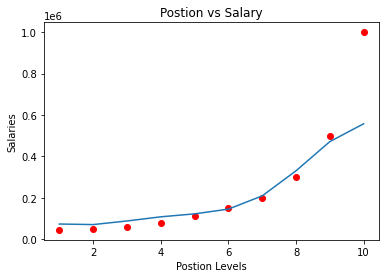

In [7]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)))
plt.title('Postion vs Salary')
plt.xlabel('Postion Levels')
plt.ylabel('Salaries')
plt.show()

In [9]:
from sklearn.metrics import r2_score
r2_score(y, regressor.predict(X))

0.7516001070620798